# Exploration créative : maille hexagonale

On part d'un maille carrée classique, de surface unitaire.

Puis on dérive sur une maille carée alternée (mais toujours de surface unitaire).

De la maille carrée, on dérive une maille hexagonale (faire le dessin avec imgshow), toujours de surface unitaire.

Quel est le côté c de l'hexagone ?

On part de la relation $c \cos{\frac{\pi}{6}} = \frac{1}{2}$

Par la relation $\cos^2{\frac{\pi}{6}} = 1 - \sin^2{\frac{\pi}{6}}$ et $\sin{\frac{\pi}{6}}=\frac{1}{2}$, il vient $\cos{\frac{\pi}{6}} = \sqrt{1 - \frac{1}{4}} = \frac{\sqrt{3}}{2}$ et donc $c = \frac{1}{\sqrt{3}}$



In [ ]:
import numpy as np
def sq_grid_imx(shape, step):
    h, w = shape
    imx = np.ones(shape)
    for i in range(0, h, step):
        imx[i, :] = 0
    for j in range(0, w, step):
        imx[:, j] = 0
    return imx

def alt_sq_grid_imx(shape, step):
    h, w = shape
    imx = np.ones(shape)
    for i in range(0, h, step):
        imx[i, :] = 0
    for j in range(0, w, step):
        for i in range(0, h, 2 * step):
            imx[i:i+step, j] = 0
    for j in range(step // 2, w, step):
        for i in range(step, h, 2 * step):
            imx[i:i+step, j] = 0
    return imx

# pas la bonne approche
# deux approches : 1/ ponctuelle chaque pixel 'sait' s'il doit d'alluer ou non
# 2/ holistique : tracer des séries de lignes pointillées bien callées
def hex_grid_imx(shape, step):
    h, w = shape
    imx = np.ones(shape)
    for i in range(0, h, step):
        for j in range(0, w, 2 * step):
            x0, y0 = j, i
            x1, y1 = x0 + step, y0
            x2, y2 = x0 + 3 * step // 2, y0 + step // 2
            x3, y3 = x1 + step, y0 + step
            x4, y4 = x2, y3 + step // 2
            x5, y5 = x0, y3 + step
            vertices = [(x0, y0), (x1, y1), (x2, y2), (x3, y3), (x4, y4), (x5, y5)]
            np.fill(imx, 0, vertices)
    return imx

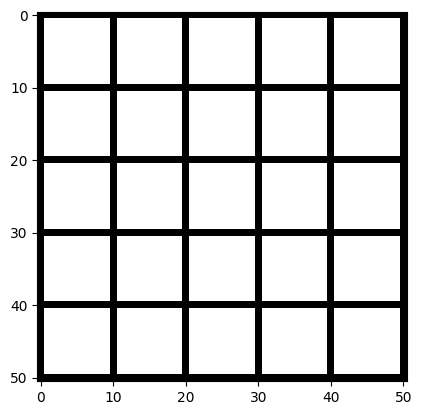

In [ ]:
import matplotlib.pyplot as plt
X = sq_grid_imx((51, 51), 10)
plt.imshow(X, cmap="gray")
plt.show()

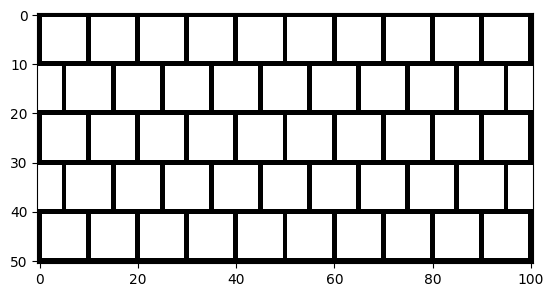

In [ ]:
import matplotlib.pyplot as plt
Y = alt_sq_grid_imx((51, 101), 10)
plt.imshow(Y, cmap="gray")
plt.show()

Première approche :

Tracer 3 jeux de lignes pointillées, donc de séries de segments.

Il y a 3 directions, d'angles respectifs $\displaystyle\frac{2\pi}{3}$.

Les pointillés sont à raison d'un $c$ tracé suivi de $2c$ blancs.

Le seul paramètre est $c$.

Les paralèles sont alternées.

Entre deux parallèles alternées, la distance est la distance du centre de l'hexagone au centre de son côté.

Cette distance est de $c\cos{\frac{\pi}{6}} = c\frac{\sqrt{3}}{2}$.

Commencer par tracer UNE droite d'inclinaison $\frac{\pi}{6}$ par rapport aux abscisses.

In [ ]:
import math
def trux(shape, a_0):
    h, w = shape
    imx = np.ones(shape)
    a_1 = math.tan(math.pi / 6)
    for x in range(w):
        y = round(a_0 - a_1 * x)
        if y < 0:
            break
        imx[y, x] = 0
        #print(x, y)
    return imx

print(math.tan(math.pi / 6))

0.5773502691896257


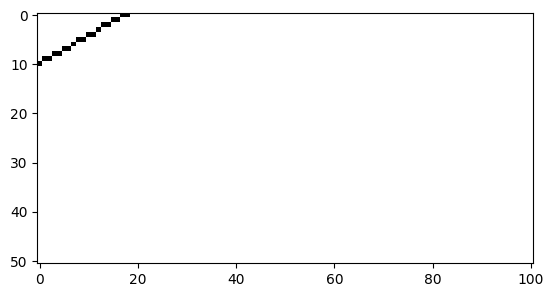

In [ ]:
import matplotlib.pyplot as plt
Z = trux((51, 101), 10)
plt.imshow(Z, cmap="gray")
plt.show()

Ajouter $c$, pour jouer deux rôles, d'abord pour déterminer les pointillés, ensuite pour déterminer l'espacement entre les lignes pointillées

$\theta$

In [ ]:
def fill_with_dash(imx, theta, c, a_0, offset=0):
    h, w = imx.shape
    a_1 = math.tan(theta)
    co = c * math.cos(theta) 
    for x in range(w):
        x_st = math.floor(x / co) + offset
        if x_st % 3 > 0:
            continue
        y = round(a_1 * x + a_0)
        if y < 0 or y >= h:
            continue
        imx[y, x] = 0
        #print(x, y)
    return imx    

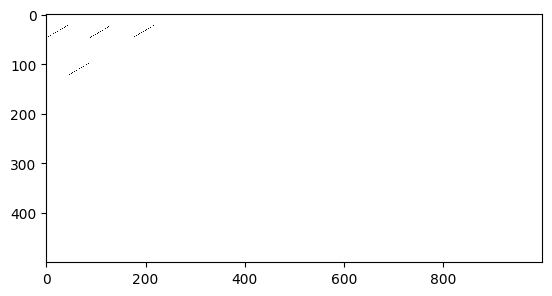

In [ ]:
import math
import matplotlib.pyplot as plt

imx = np.ones((500, 1000))
theta = -math.pi / 6
c = 50
fill_with_dash(imx, theta, c, c)
fill_with_dash(imx, theta, c, 2 * c, 1)
fill_with_dash(imx, theta, c, 3 * c, 2)
plt.imshow(imx, cmap="gray", interpolation='nearest')
plt.show()

In [ ]:
def fill_with_dashes(imx, theta, c, offset=0):
    h, w = imx.shape
    a_1 = math.tan(theta)
    a_0_min = 0
    a_0_max = (h - 1)
    if a_1 > 0:
        a_0_min = c * math.ceil((a_0_min - a_1 * (w - 1)) / c)
    else:
        a_0_max = c * math.floor((a_0_max - a_1 * (w - 1)) / c)
    
    #offset = 0
    for a_0 in range(a_0_min, a_0_max, c):
        fill_with_dash(imx, theta, c, a_0, offset)
        if a_1 < 0:
            offset += 1
        else:
            offset -= 1
        offset %= 3

In [ ]:
# je pense que je n'ai pas choisi la bonne approche avec des fonctions affines
def fill_with_vdashes(imx, c):
    d = c * math.cos(math.pi / 6)
    """
    i in [0, 1]c et j = [0, 2, 4, ... (2k)]d
    i in [1/2 + [1, 2]]c et j = [1, 3, 5, ... (2k+1)]d
    i in [3, 4]c et j = [0, 2, 4, ... (2k)]d
    i in [1/2 + [4, 5]]c et j = [1, 3, 5, ... (2k+1)]d

    i in [3q, 3q+1]c et j = [0, 2, 4, ... (2k)]d
    i in [1/2 + [3q+1, 3q+2]]c et j = [1, 3, 5, ... (2k+1)]d
    avec q = 0, 1, ..., q_max : q_max dépend de h : int(h / c) % 3 dit la nature de la dernière rangée
    et int(h / c) le nombre de rangées


    """

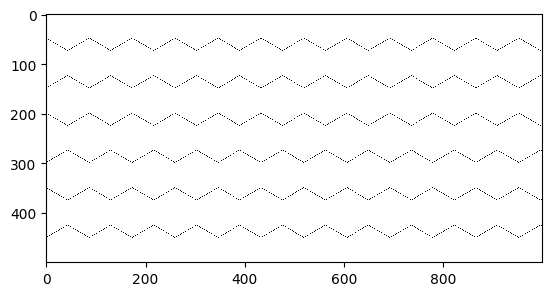

In [ ]:
import math
import matplotlib.pyplot as plt

imx = np.ones((500, 1000))
theta_0 = math.pi / 6
theta_1 = math.pi / 2
theta_2 = -math.pi / 6

c = 50
fill_with_dashes(imx, theta_0, c, offset=0)
#fill_with_dashes(imx, theta_1, c)
fill_with_dashes(imx, theta_2, c, offset=0)
plt.imshow(imx, cmap="gray", interpolation='nearest')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
Z = hex_grid_imx((51, 51), 10)
plt.imshow(Z, cmap="gray")
plt.show()

In [ ]:
def get_hex_mask():
    pass